In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

# Load the data

In [2]:
df = pd.read_csv("../data/raw/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Dropping duplicates

Checking duplicated columns

In [4]:
print(f"Before duplicated data removal: {len(df)} rows")

Before duplicated data removal: 100000 rows


In [5]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print(f"After duplicated data removal: {len(df)} rows")

After duplicated data removal: 96146 rows


# Missing values

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There are no missing value found in the dataset 

# EDA

In [9]:
target_var = "diabetes"

In [10]:
cat_vars = [col for col in df.columns.values if df[col].dtype == "O" and col != target_var]

In [11]:
cat_vars

['gender', 'smoking_history']

In [12]:
num_vars = [col for col in df.columns.values if df[col].dtype in ["int64", "float64"] and col != target_var]

In [13]:
num_vars

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [14]:
discrete_num_vars = [col for col in num_vars if df[col].nunique() <= 10]

In [15]:
cont_num_vars = [col for col in num_vars if col not in discrete_num_vars]

In [16]:
discrete_num_vars

['hypertension', 'heart_disease']

In [17]:
cont_num_vars

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

## Univariate Analysis

### Target Variable

In [18]:
def countplot(df, col):
    index = df[col].value_counts().index
    ax = sns.countplot(x=col, data=df, order=index)
    ax.bar_label(ax.containers[0])
    

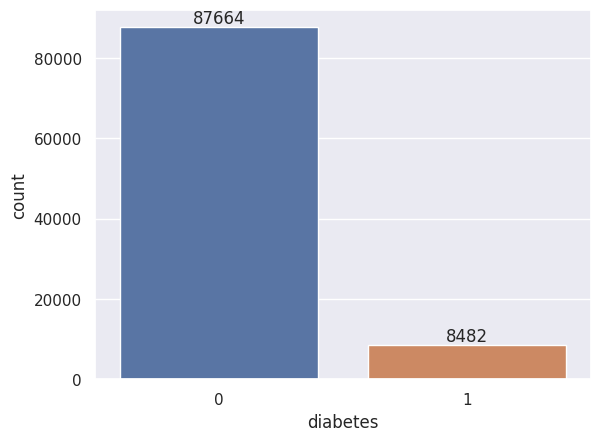

In [19]:
countplot(df, target_var)
plt.show()

It seems the person who **gets diabetes** is 10 times less than the person **without diabetes**

### Categorical variables and discrete numerical variables

In [20]:
cat_vars

['gender', 'smoking_history']

In [21]:
discrete_num_vars

['hypertension', 'heart_disease']

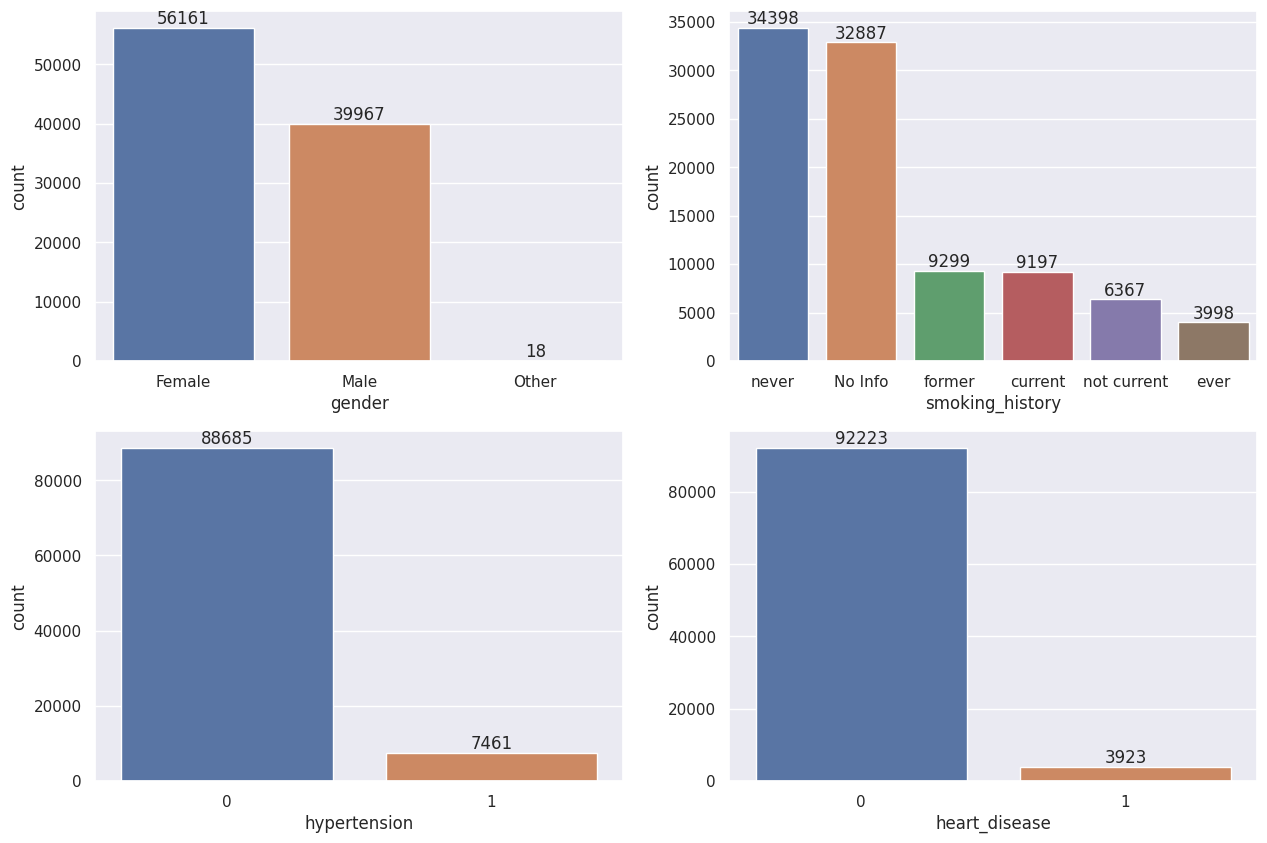

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_vars+discrete_num_vars):
    
    plt.subplot(2, 2, i+1)
    countplot(df, col)
    
plt.show()

- **Females** are the largest group in the dataset
- For **smoking history**, **never** is the largest group.

### Continuous Numerical variables

In [23]:
cont_num_vars

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

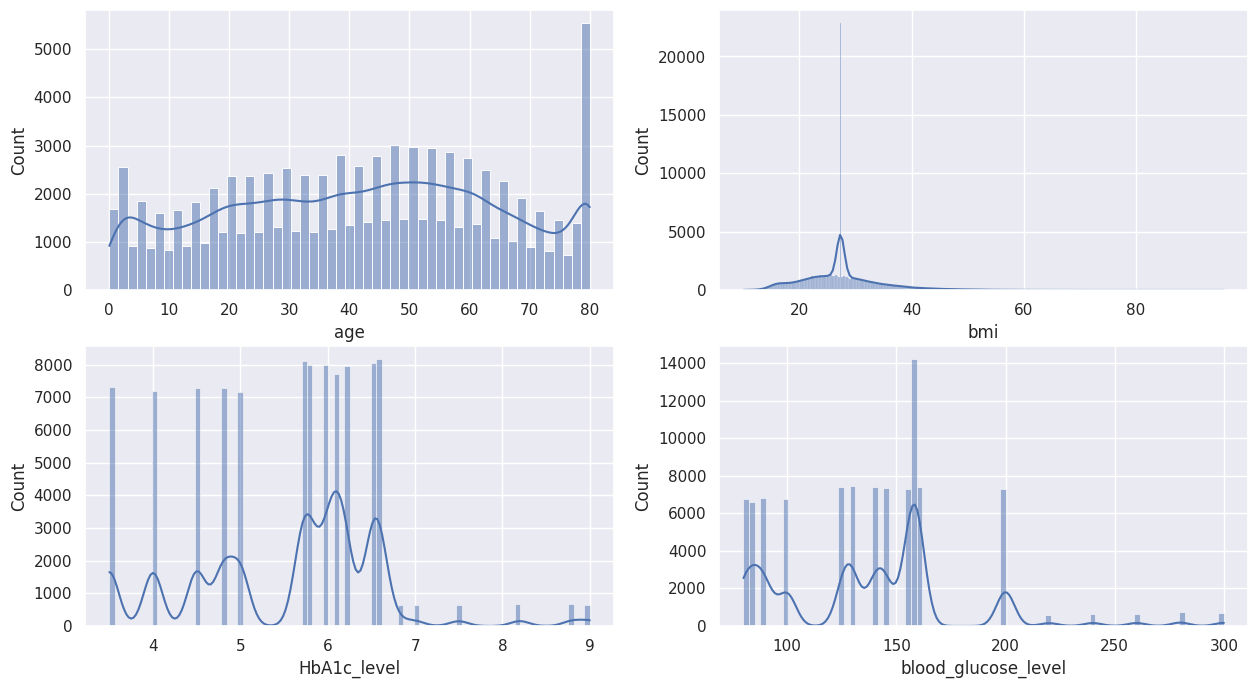

In [24]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(cont_num_vars):
    
    plt.subplot(2, 2, i+1)
    sns.histplot(x=col, data=df, kde=True)
    
plt.show()

## Bivariate Analysis

### Continuous nuermical variables

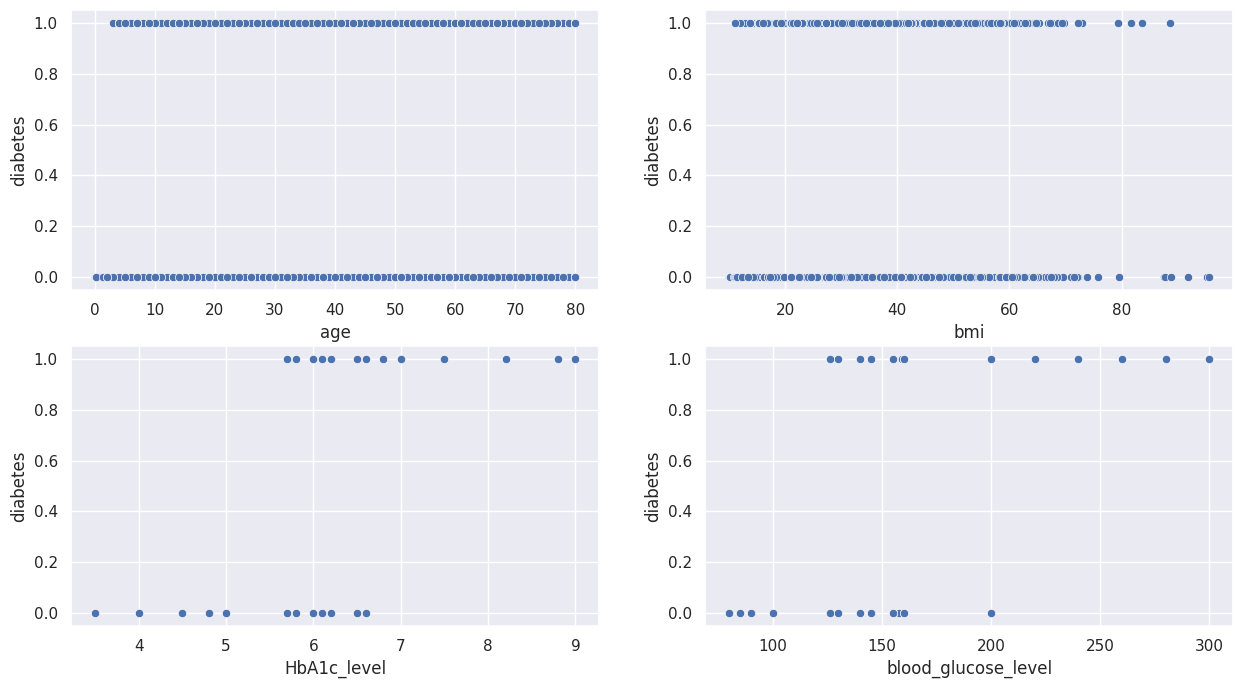

In [25]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(cont_num_vars):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=col, y=target_var, data=df)
    
plt.show()
    

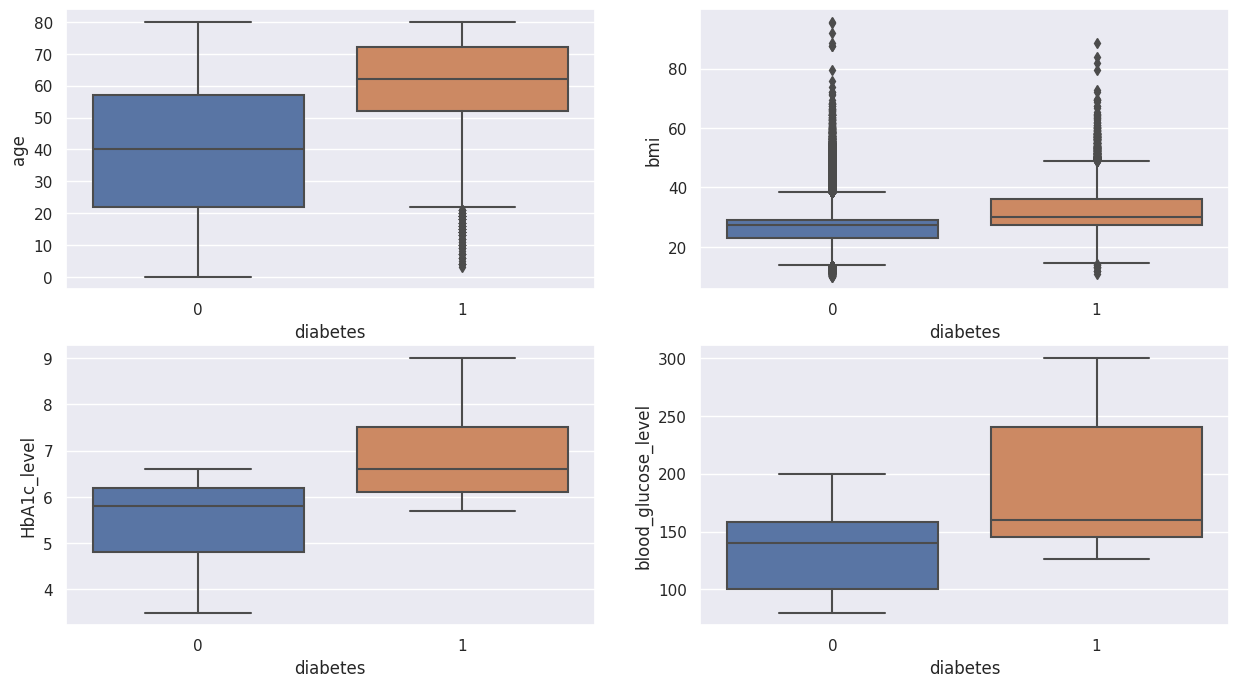

In [26]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(cont_num_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=target_var, y=col, data=df)
    
plt.show()

From the above charts, 

- We can see clearly that high level of **HbA1c_level** and **blood_glucose_level** can be seen in the **people with diabetes**
- We can also **older people (high age)** has more diabetes that the **younger people (low age)** but that was not very significant like in above two features.

### Discrete numerical variables and categorical variables

In [27]:
def countplot_bivariate(df, col, ax):
    
    sns.countplot(x=col, hue=target_var, data=df)
    for container in ax.containers:
        ax.bar_label(container)

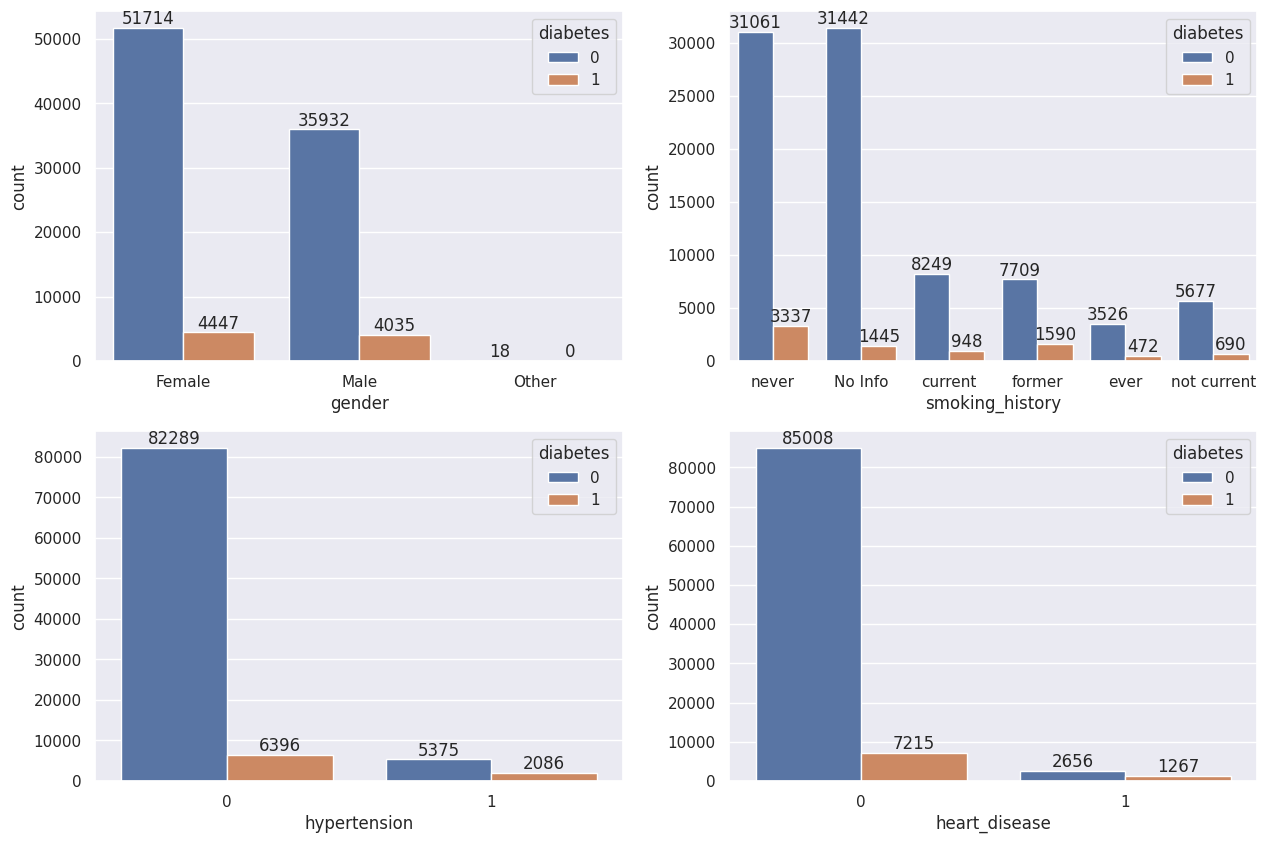

In [28]:
fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_vars+discrete_num_vars):
    ax = fig.add_subplot(2, 2, i+1)
    countplot_bivariate(df, col, ax)
    
plt.show()

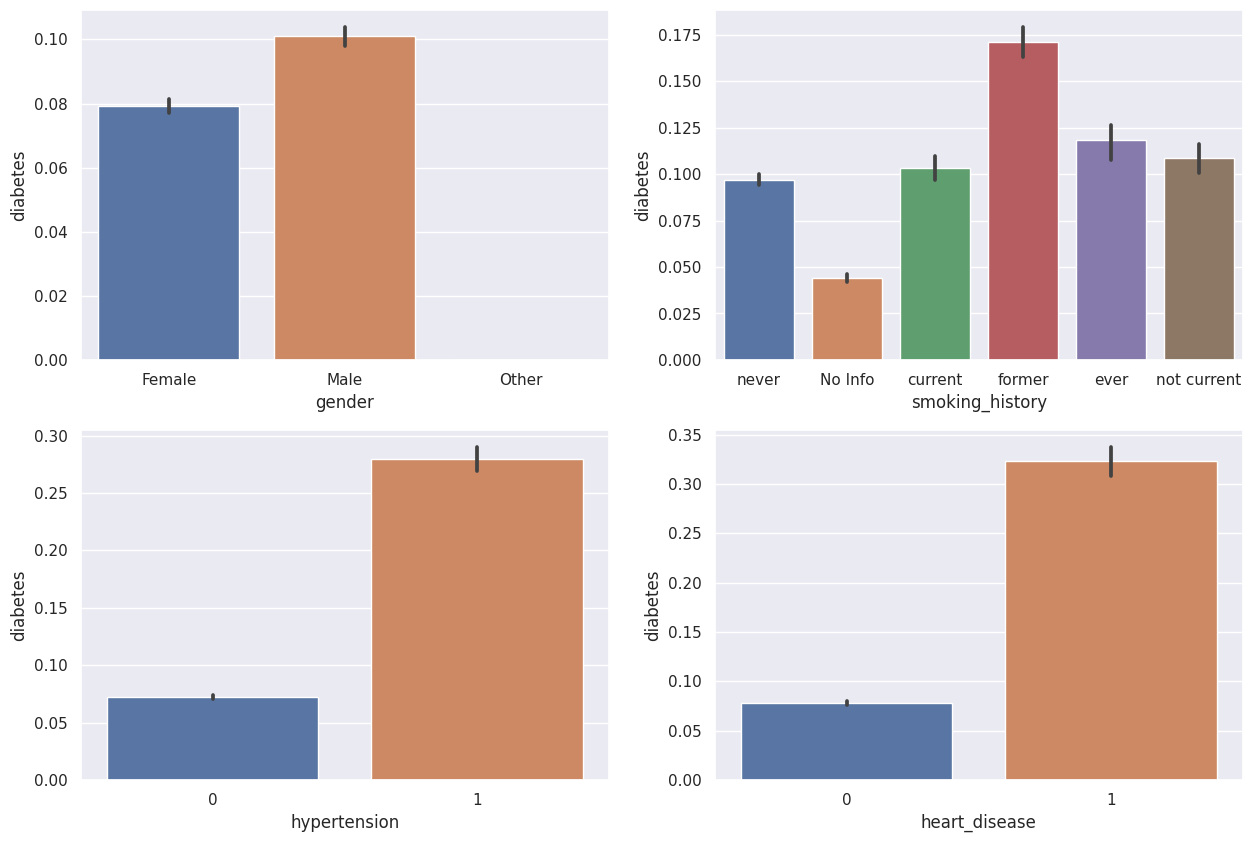

In [29]:
fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_vars+discrete_num_vars):
    ax = fig.add_subplot(2, 2, i+1)
    sns.barplot(x=col, y=target_var, data=df)
    
plt.show()

- By propotion (people with diabetes divided by total people; known from bar graph), it's significant that higher proportion of the people with **hypertension** and **heart_disease** have diabetes than the people without these.
- **Male** with diabetes has slightly higher in proportion than **female** with diabetes in the dataset.
- For smoking habits, people with **former smoking habits** has the highest proportion of diabetes in the dataset. 

## Model correlation

In [48]:
cols = num_vars[:]
cols.append(target_var)

In [49]:
corr = df[cols].corr()

In [56]:
mask = np.triu(np.ones_like(corr))

<Axes: >

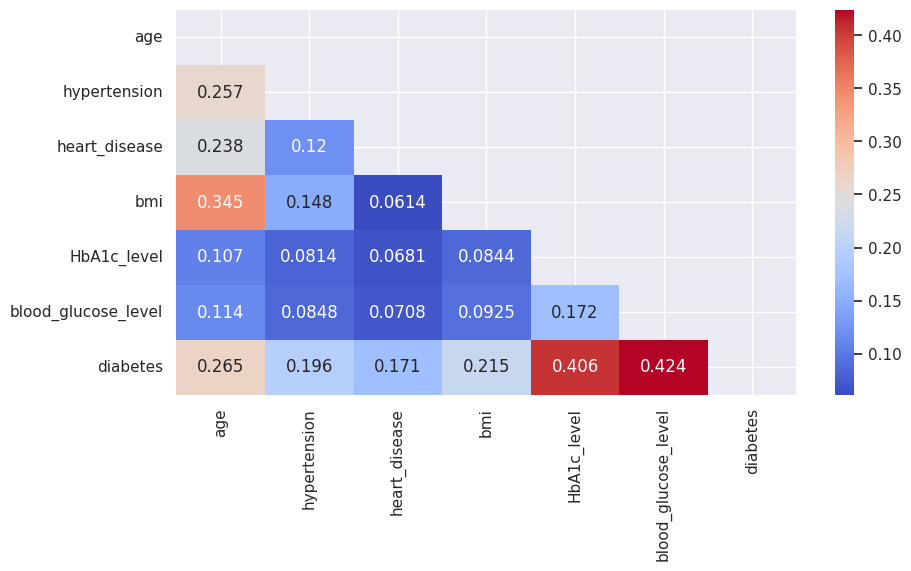

In [57]:
plt.figure(figsize=(10, 5))

sns.heatmap(corr, annot=True, fmt='.3g', cmap="coolwarm", mask=mask)